In [113]:
import pandas as pd
from gplearn.genetic import SymbolicRegressor
import matplotlib.pyplot as plt

In [114]:
# Read the dataset from CSV file
data1 = pd.read_csv("datasets/dataset_1.csv")

In [115]:
# filtering the y value considering only values which are between -5 and 5
data1 = data1[data1['y'] > -5]
data1 = data1[data1['y'] < 5]

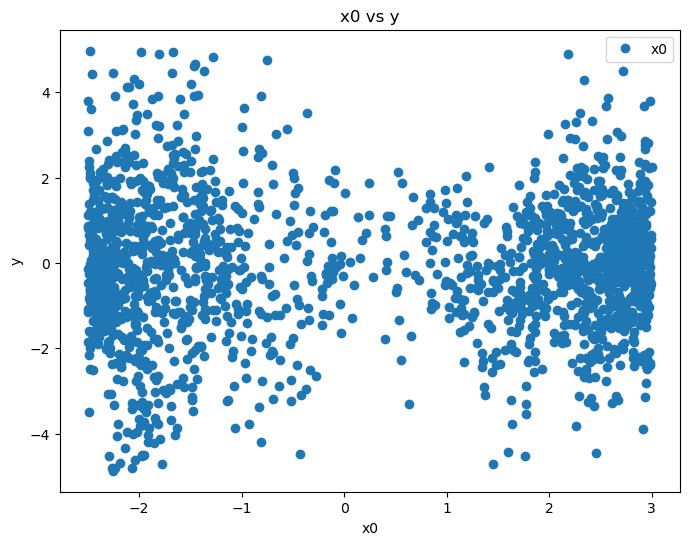

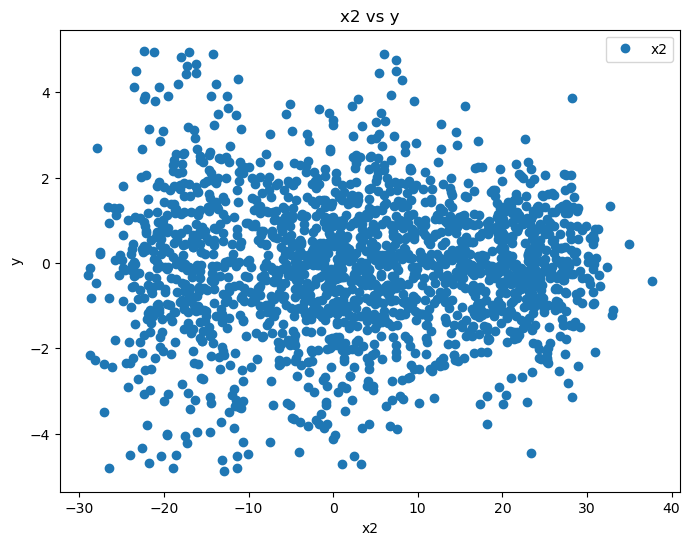

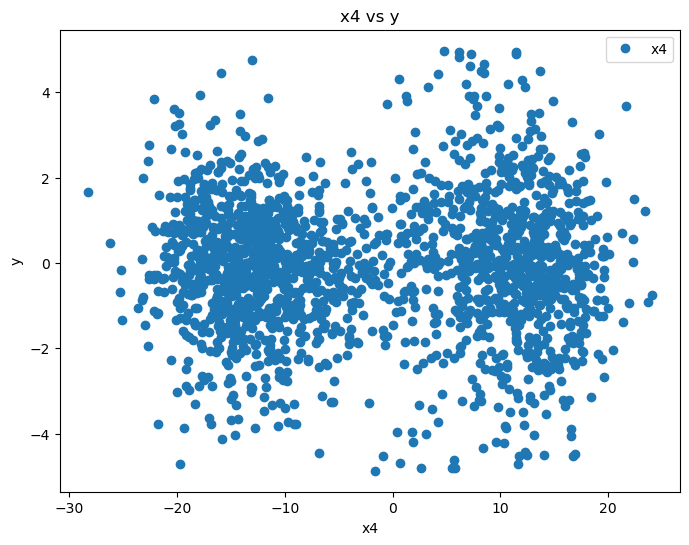

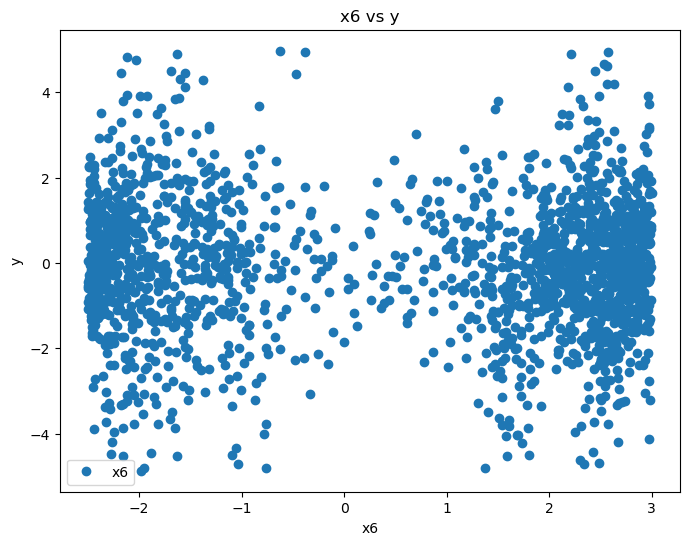

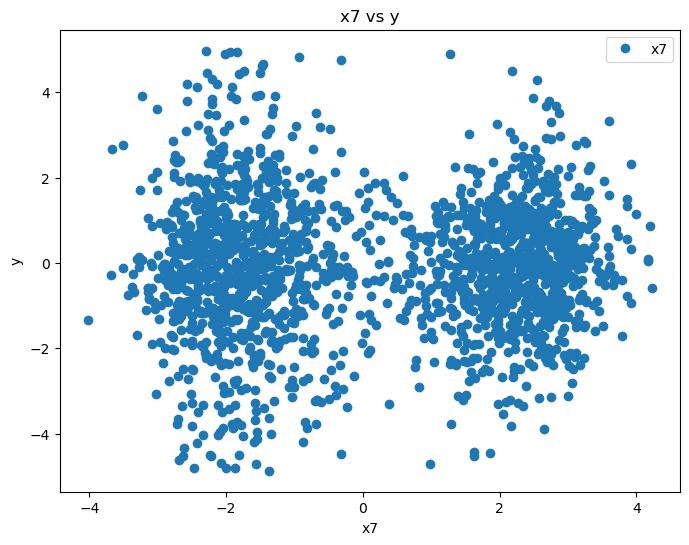

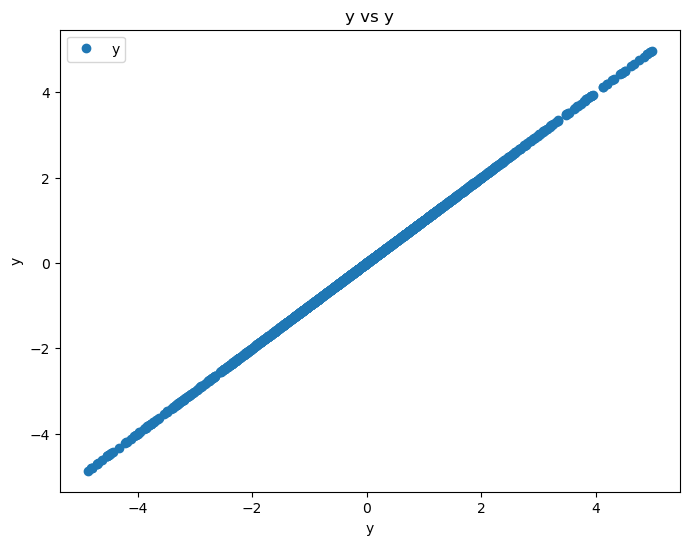

In [121]:
# Get the column names of X variables (assuming they are X1 to X8)
x_columns = data1.columns[0:8]

for x_col in x_columns:
    plt.figure(figsize=(8, 6))
    plt.plot(data1[x_col], data1['y'], 'o', label=x_col)
    plt.xlabel(x_col)
    plt.ylabel('y')
    plt.title(f'{x_col} vs y')
    plt.legend()
    plt.show()

In [122]:
# based on above graph only different sacttered values are considered
selected_columns = ['x0', 'x2', 'x4','x6', 'x7', 'y']
data1 = data1[selected_columns]

calculating best model based on liner regression

In [137]:
X = data1.iloc[:, :-1]
y = data1.iloc[:, -1]


# Fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Get the coefficients and intercept
coefficients = model.coef_
intercept = model.intercept_

file_name = "dataset_1_best_model"

# Build the expression
expression = f"{intercept}"
for i, coef in enumerate(coefficients):
    expression += f" + {coef}*{selected_columns[i]}"

# Output the expression
print("dataset_1_best_model:")
print(expression)

# Write the expression to the file
with open(file_name, "w") as file:
    file.write(expression)

print(f"The expression has been written to {file_name}.")

dataset_1_best_model:
-0.061889602053649025 + 0.08551798260799069*x1 + -0.00670688275565787*x2 + -0.0047566982970982516*x4 + -0.02041331998043954*x9 + -0.034272645941507265*x10
The expression has been written to dataset_1_best_model.


In [124]:
data2 = pd.read_csv("datasets/dataset_2.csv")

In [125]:
X2 = data2.drop("y", axis=1)
y2 = data2["y"]

Finding out the best model for dataset to based on SymbolicRegressor

In [126]:
regressor = SymbolicRegressor(population_size=1000, generations=20, verbose=1)
regressor.fit(X2, y2)

    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    27.85      6.38206e+17        9       0.00500162              N/A      6.32s
   1    14.63          14200.7        7       0.00461902              N/A      4.10s
   2     3.97          3843.23        5       0.00457554              N/A      3.34s
   3     3.00          72.8437        3       0.00499998              N/A      3.26s
   4     2.95          62.8892        3       0.00499998              N/A      3.05s
   5     3.10          1776.72        3       0.00499998              N/A      2.89s
   6     3.04          88.6838        3       0.00499998              N/A      2.65s
   7     3.02          83.7026        3       0.00499998              N/A      2.62s
   8     3.15          87.8935        3       0.00499998              N/A  

SymbolicRegressor(verbose=1)

In [138]:
print("Best Model Equations:")
print(regressor._program)

Best Model Equations:
div(X5, X3)


In [132]:
# Read the dataset from CSV file
data3 = pd.read_csv("datasets/dataset_3.csv")

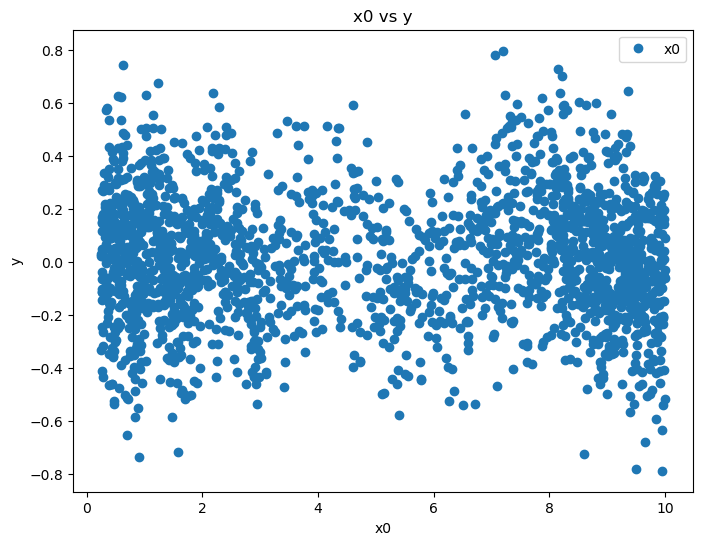

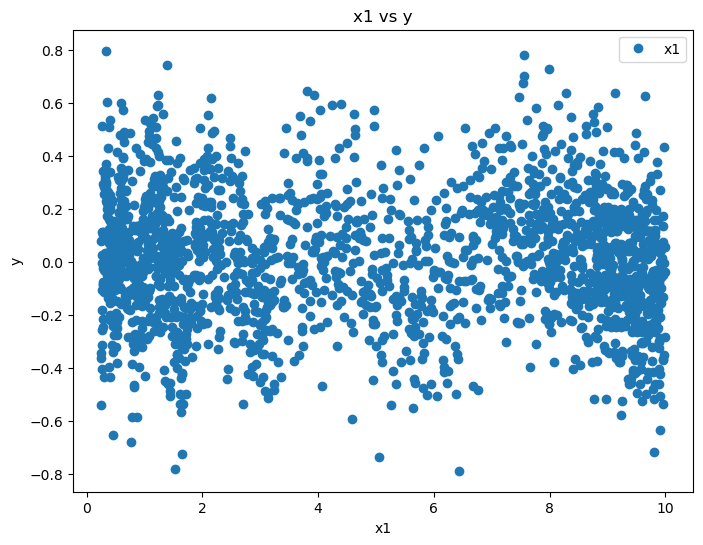

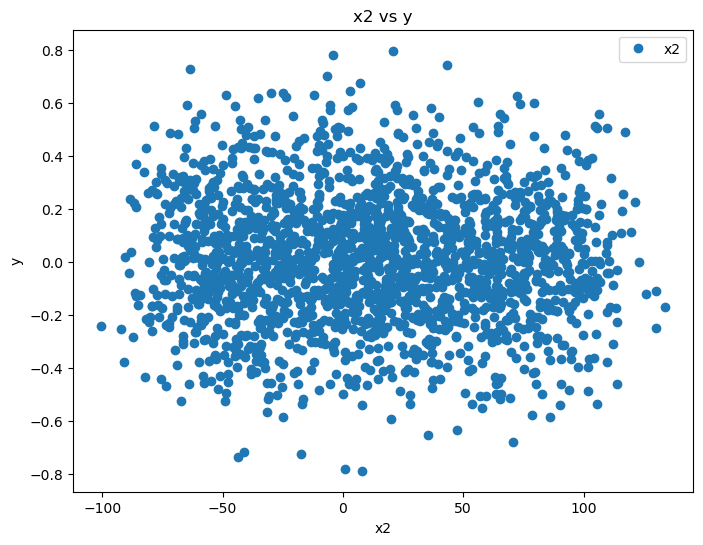

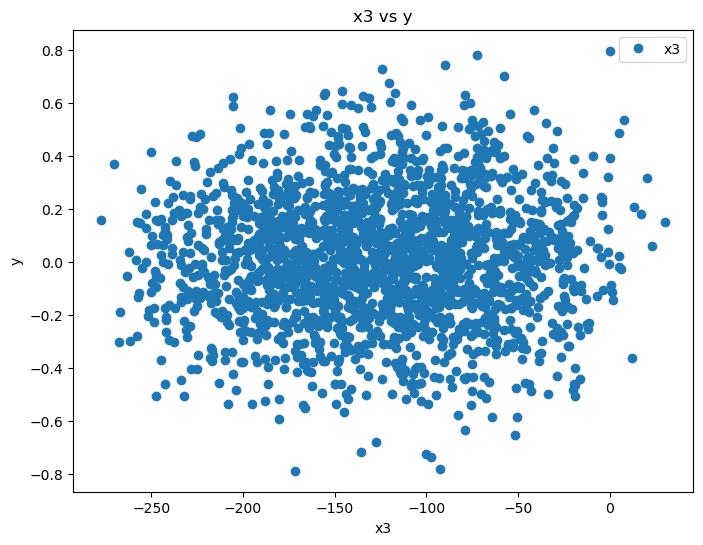

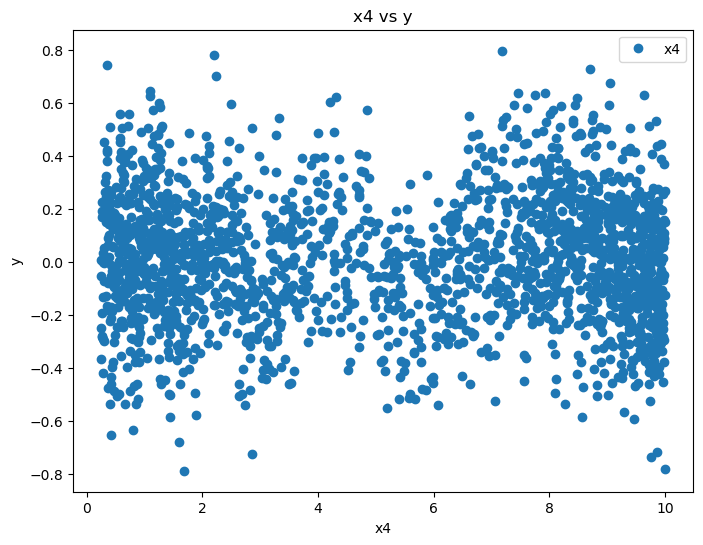

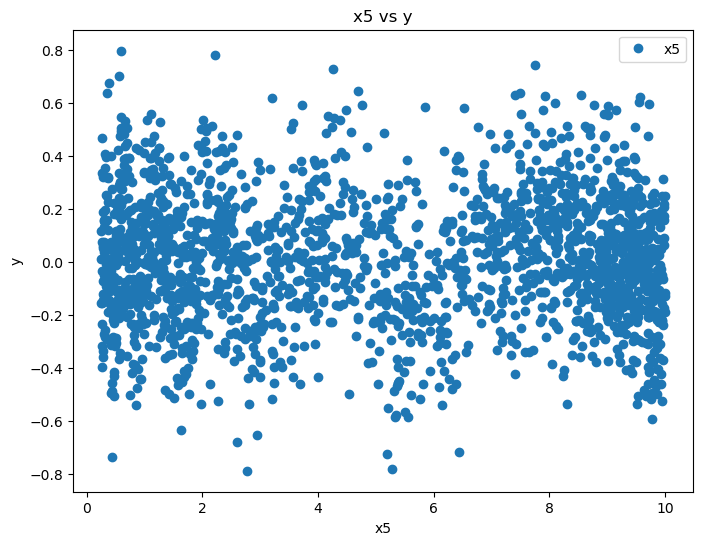

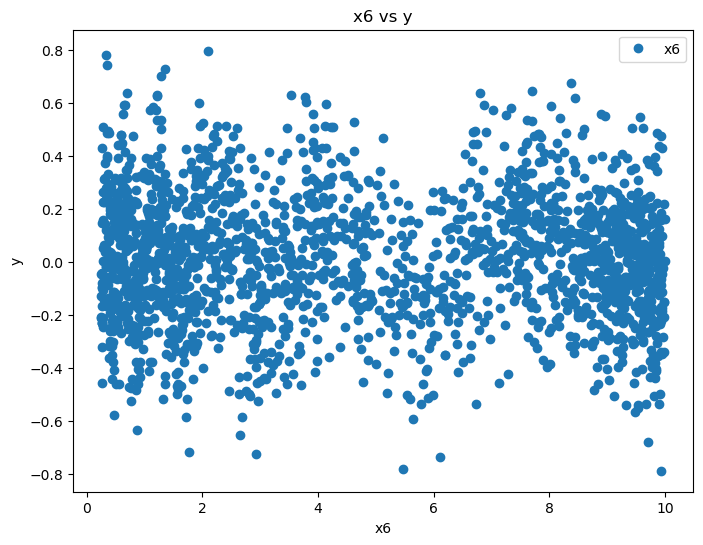

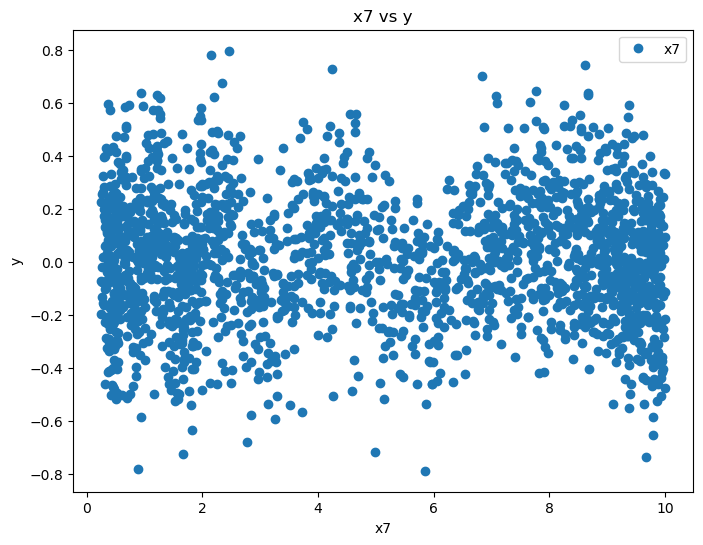

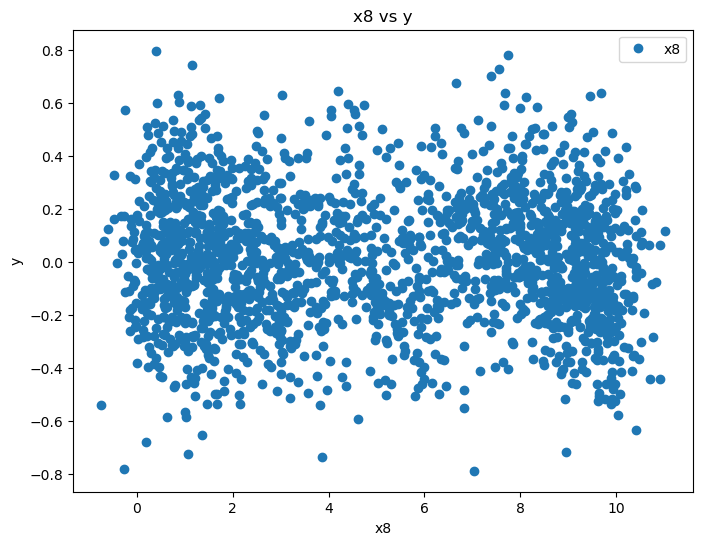

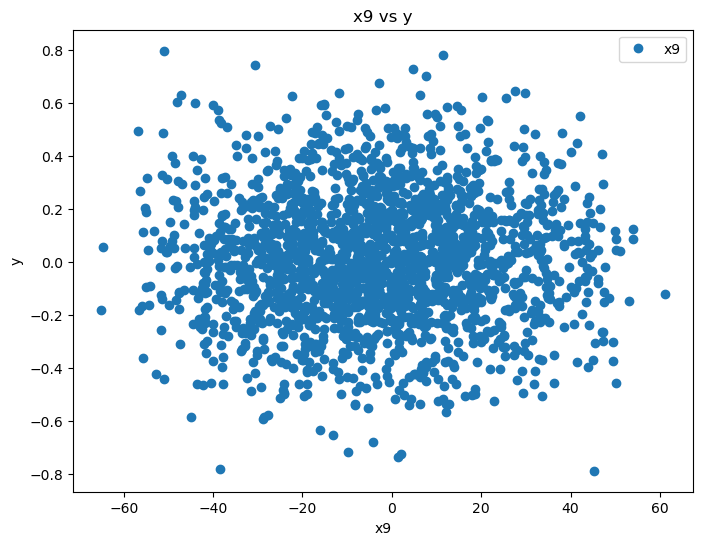

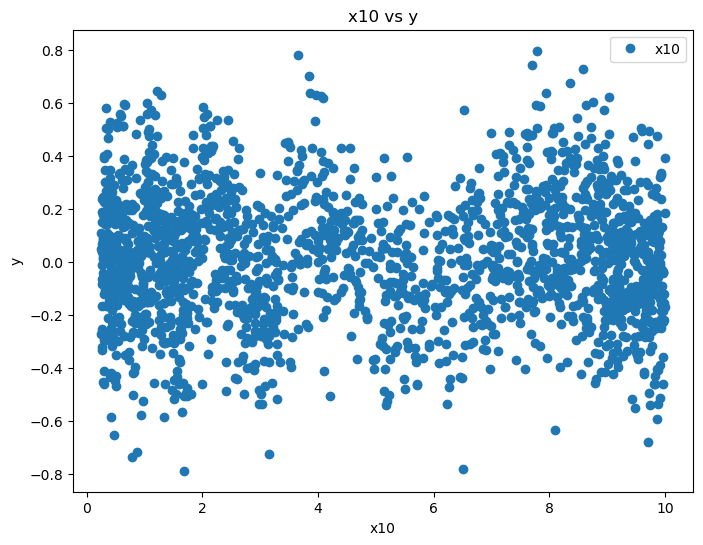

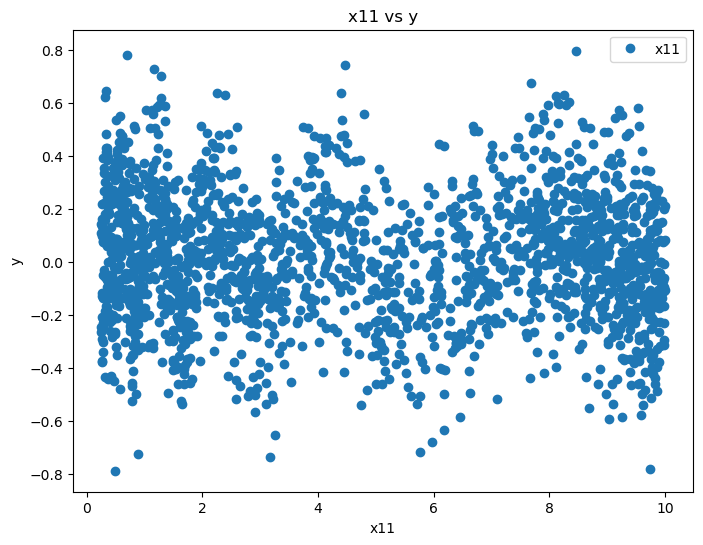

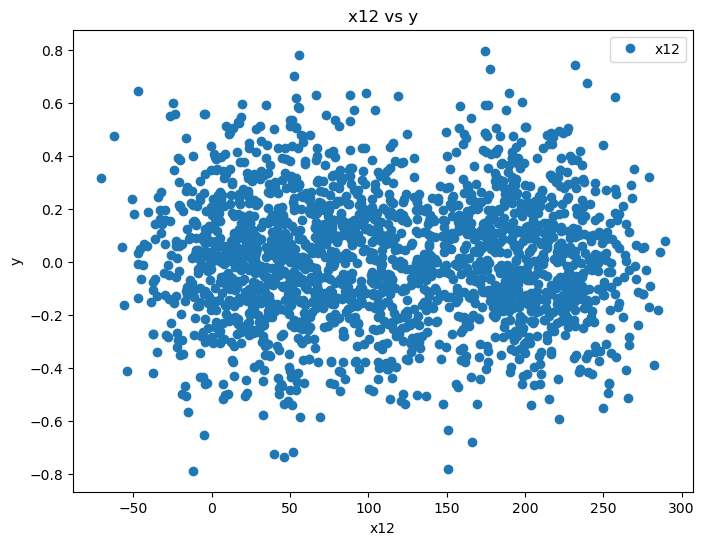

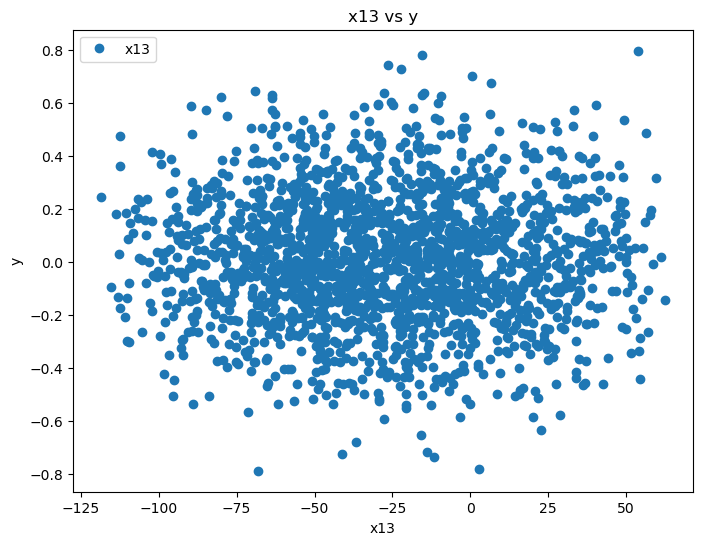

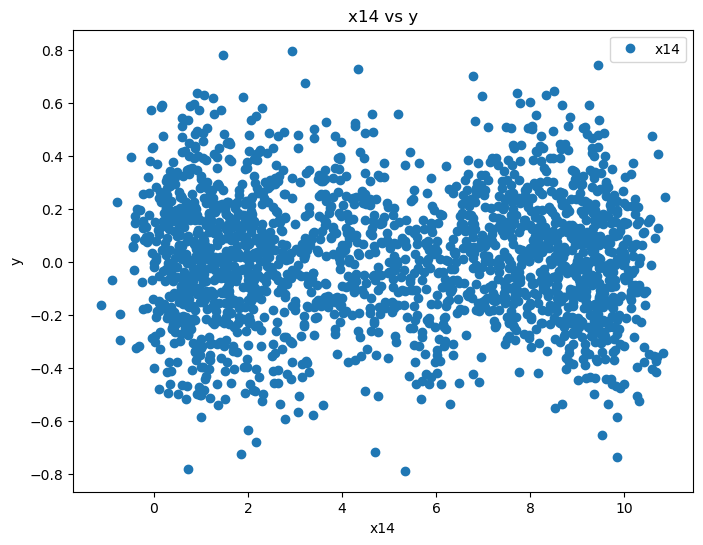

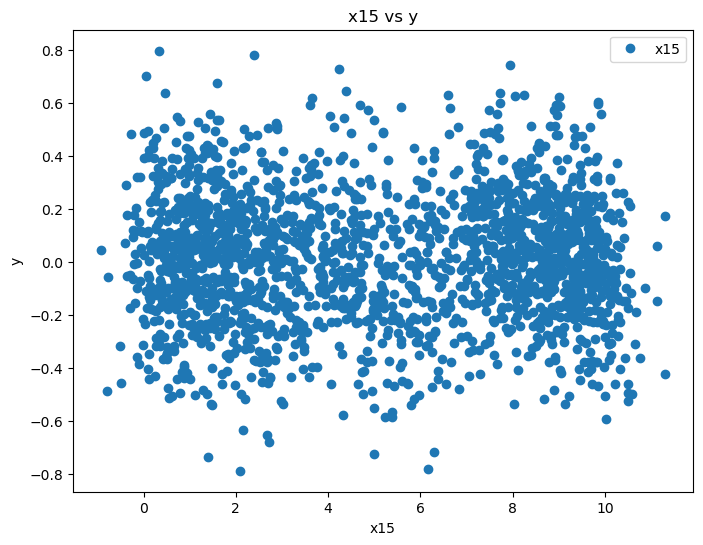

In [133]:
# Get the column names of X variables (assuming they are X1 to X8)
x_columns = data3.columns[0:16]

for x_col in x_columns:
    plt.figure(figsize=(8, 6))
    plt.plot(data3[x_col], data3['y'], 'o', label=x_col)
    plt.xlabel(x_col)
    plt.ylabel('y')
    plt.title(f'{x_col} vs y')
    plt.legend()
    plt.show()

In [134]:
# considering the specific column as values of x0 is similar to X1, x2 is similar to x3, x3 is similar to x4,...
selected_columns = ['x1', 'x2', 'x4','x9','x10','x13','x14', 'y']
data3 = data3[selected_columns]

In [139]:
X3 = data3.iloc[:, :-1]
y3 = data3.iloc[:, -1]


# Fit the linear regression model
model = LinearRegression()
model.fit(X3, y3)

# Get the coefficients and intercept
coefficients = model.coef_
intercept = model.intercept_

file_name = "dataset_3_best_model"

# Build the expression
expression = f"{intercept}"
for i, coef in enumerate(coefficients):
    expression += f" + {coef}*{selected_columns[i]}"

# Output the expression
print("dataset_3_best_model:")
print(expression)

with open(file_name, "w") as file:
    file.write(expression)

print(f"The expression has been written to {file_name}.")

dataset_3_best_model:
0.04775351580625009 + -0.0019599676933630458*x1 + -0.0002870054321218585*x2 + -0.002376520502176837*x4 + 5.436209210113286e-06*x9 + -0.0005229598165321627*x10 + 7.162350305406234e-05*x13 + -0.0009928500252631746*x14
The expression has been written to dataset_3_best_model.
